In [6]:
import shapefile
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import numpy as np
from matplotlib.cm import *
from IPython.display import Image as ImageShow

In [7]:
train_shape = shapefile.Reader("./data/data/train/train")
test_shape = shapefile.Reader("./data/data/test/test")

In [8]:
len(train_shape.shapes())

2497

In [9]:

shapes  = train_shape.shapes()
#shapes

In [10]:
for name in dir(shapes[5]):
    if not name.startswith('__'):
        print (name)

_from_geojson
bbox
parts
points
shapeType
shapeTypeName


In [11]:

# Get the bounding box of the 5th shape.
# Round coordinates to 3 decimal places
bbox = shapes[5].bbox
print (['%.3f' % coord for coord in bbox])

['2468639.338', '-3351807.736', '2468711.834', '-3351425.677']


In [12]:
shape_ex = train_shape.shape(5)

In [13]:
x_lon = np.zeros((len(shape_ex.points), 1))
y_lat = np.zeros((len(shape_ex.points), 1))
for ip in range(len(shape_ex.points)):
    x_lon[ip] = shape_ex.points[ip][0]
    y_lat[ip] = shape_ex.points[ip][1]

(2468639.3383201924, 2468711.8342985143)

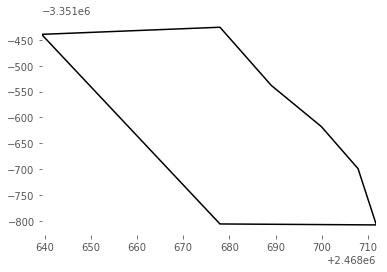

In [14]:
fig     = plt.figure()
ax      = fig.add_subplot(111)
ax.get_yaxis().set_visible(True)
ax.get_xaxis().set_visible(True)
ax.set_frame_on(False)
plt.plot(x_lon,y_lat,'k')

# use bbox (bounding box) to set plot limits
plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])

In [15]:

def plot(sf):

    #   -- plot --
    fig     = plt.figure()
    ax      = fig.add_subplot(111)
    ax.get_yaxis().set_visible(True)
    ax.get_xaxis().set_visible(True)
    #ax.set_frame_on(False)

    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x,y)

    plt.show()

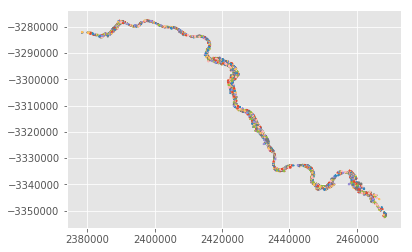

In [16]:
plot(train_shape)

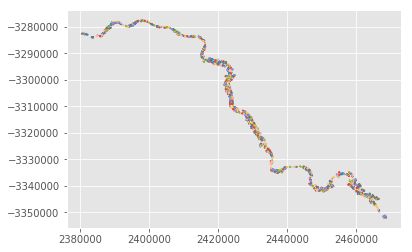

In [17]:
plot(test_shape)

In [5]:
import cv2
img = cv2.imread("data/data/S2A_MSIL1C_20170101T082332_N0204_R121_T34JEP_20170101T084543.SAFE/GRANULE/L1C_T34JEP_A007983_20170101T084543/IMG_DATA/T34JEP_20170101T082332_TCI.jp2")

error: OpenCV(4.1.0) /io/opencv/modules/imgcodecs/src/grfmt_jpeg2000.cpp:104: error: (-213:The function/feature is not implemented) imgcodecs: Jasper (JPEG-2000) codec is disabled. You can enable it via 'OPENCV_IO_ENABLE_JASPER' option. Refer for details and cautions here: https://github.com/opencv/opencv/issues/14058 in function 'initJasper'


In [ ]:
import numpy as np
import rasterio

# Read raster bands directly to Numpy arrays.
#
with rasterio.open('data/data/S2A_MSIL1C_20170101T082332_N0204_R121_T34JEP_20170101T084543.SAFE/GRANULE/L1C_T34JEP_A007983_20170101T084543/IMG_DATA/T34JEP_20170101T082332_TCI.jp2') as src:
    r, g, b = src.read()

# Combine arrays in place. Expecting that the sum will
# temporarily exceed the 8-bit integer range, initialize it as
# a 64-bit float (the numpy default) array. Adding other
# arrays to it in-place converts those arrays "up" and
# preserves the type of the total array.
total = np.zeros(r.shape)
for band in r, g, b:
    total += band
total /= 3

# Write the product as a raster band to a new 8-bit file. For
# the new file's profile, we start with the meta attributes of
# the source file, but then change the band count to 1, set the
# dtype to uint8, and specify LZW compression.
profile = src.profile
profile.update(dtype=rasterio.uint8, count=1, compress='lzw')

with rasterio.open('example-total.tif', 'w', **profile) as dst:
    dst.write(total.astype(rasterio.uint8), 1)